# 1. Préparation du travail
Importons tous les modules nécessaires.

In [1]:
# Imports nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans

Chargeons le jeu de données prétraité fourni à l'issue de la séance 1 qui se trouve dans le fichier JO_clean.csv et affichons les 5 premières lignes pour vérifier que le chargement a été effectué correctement.
Pensez à télécharger au préalable le fichier JO_clean.csv et à le placer dans le même dossier que votre notebook.
Si vous avez importé le notebook sur Google Colab, il faut exécuter la cellule ci-dessous au préalable pour télécharger votre jeu de données dans votre environnement de travail sur Colab (inutile dans le cas où vous exécutez le notebook sur votre propre machine) :


In [2]:
# Chargement du jeu de données et affichage des 5 premières lignes
DATA = pd.read_csv('JO_clean.csv')
DATA.head(n=5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


**Question 1 :** Sélectionnez dans le jeu de données les médaillées/médaillés (pour les étudiantes/étudiants) d'or en natation (Swimming) et en gymnastique (Gymnastics). Affichez ensuite les données sous forme de nuage de points sur lequel vous ferez apparaitre les informations de poids (Weight) et de taille (Height) ainsi que l'information du sport (Sport) de chaque sportive. 

In [92]:
# Création d'une dataframe contenant les médaillés d'or en natation et en gymnastique

df = DATA[(DATA.Medal=="Gold") & ((DATA.Sport=="Swimming")|(DATA.Sport=="Gymnastics")) 
                        & (DATA.Sex=="M")]

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
270,20312,Chen Yibing,M,23.0,160.0,58.0,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Team All-Around,Gold,China
274,20312,Chen Yibing,M,23.0,160.0,58.0,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Rings,Gold,China
276,20312,Chen Yibing,M,27.0,160.0,58.0,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,China
566,34626,Feng Zhe,M,24.0,160.0,58.0,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,China
568,34626,Feng Zhe,M,24.0,160.0,58.0,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Parallel Bars,Gold,China


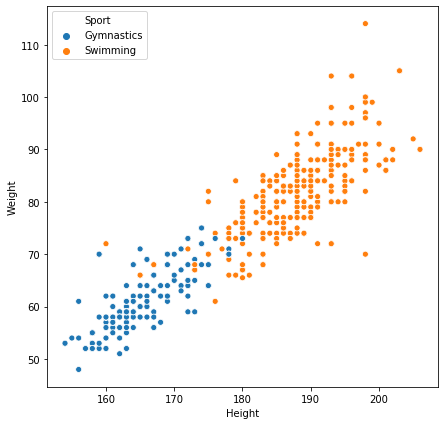

In [93]:
# Représentation des données : poids en fonction de la taille par sport

plt.figure(figsize=(7,7))
sns.scatterplot(x="Height",y="Weight",hue="Sport",data=df)

=======> Nous remarquons donc une certaine séparation des tendances (taille, poids) par sport 

**Question 2 :** On souhaite maintenant tester la méthode de classification non supervisée des k-moyennes (kmeans) sur ce nouveau jeu de données avec k = 2 classes, afin de voir si l'on retrouve les deux sports, natation et gymnastique, au travers des deux classes retournées par l'algorithme des k-moyennes. Choisissez les variables qui vous semblent pertinentes pour effectuer la classification et appliquer l'algorithme des kmeans. Construisez les clusters et affichez les coordonnées de leurs centres.

In [88]:
# Introduction de l'algorithme kmeans

X = df[["Height","Weight"]]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

In [89]:
# Vérification de la dimension des cluster_centers_

print (centroids)

[[189.40180587  83.98194131]
 [166.88389513  62.52996255]]


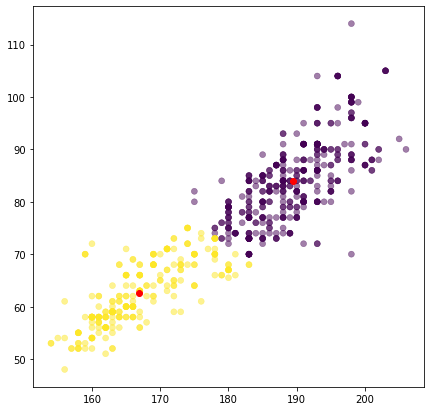

In [90]:
# Représentation graphique

plt.figure(figsize = (7,7))

plt.scatter(df['Height'], df['Weight'], 
           marker='o', alpha = 0.5, linewidths=0.5, c = y_pred)
plt.scatter(centroids[:, 0], centroids[:,1],
           marker='o', linewidths=1,color='r')

======> Nous remarquons une démarcation assez nette entre les deux clusters. Vérifions si ceux-ci correspondent aux sports mentionnés dans la question précédente.

**Question 3 :** En réutilisant la représentation graphique de la question 1, ajoutez maintenant l'information de la classe attribuée par l'algorithme des k-moyennes à chaque sportive. Peut-on dire que la classification par k-moyennes permet de séparer automatiquement les gymnastes des nageuses en fonction de leurs caractéristiques (variables choisies pour effectuer la classification) ? 

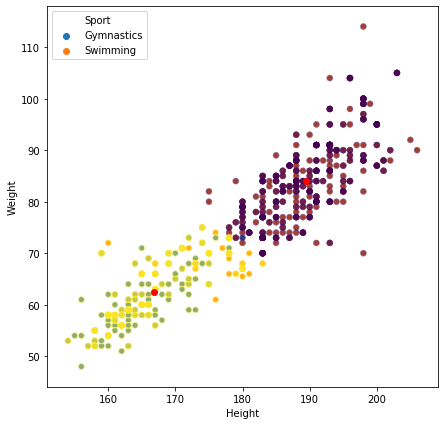

In [67]:
# Représentation des clusters et les sports dans le même graphe

plt.figure(figsize = (7,7))
sns.scatterplot(x="Height",y="Weight",hue="Sport",data=df)
plt.scatter(df['Height'], df['Weight'], 
           marker='o', alpha = 0.5, linewidths=0.5, c = y_pred)
plt.scatter(centroids[:, 0], centroids[:,1],
           marker='o', linewidths=1,color='r')

========> Nous remarquons que les tendances des clusters déterminés précédemment correspondent généralement aux différents sports. Néanmoins, il existe toujours des exceptions à cela.

**Question 4 :** Nous allons maintenant tester l'algorithme des k plus proches voisins (KNN) sur l'un des deux jeux de données étudiés en question 1 ou 4. En ne retenant que les caractéristiques physiques (poids et taille), effectuez la phase d'apprentissages de l'algorithme KNN. En choisissant le jeu de données adaptés (sportives ou sportifs) quel serait d'après vos caractéristiques physiques le sport le plus adapté pour vous si vous vouliez gagner une médaille d'or aux prochains JO ? (vous pouvez indiquer des caractéristiques physiques fictives dans le notebook que vous rendrez à l'issue de la séance ;) )

Pour créer le jeu de données test contenant vos caractéristiques physiques vous pouvez utiliser la syntaxe suivante : 

`df_test = pd.DataFrame({'Height' : [votre_taille], 'Weight': [votre_poids]})`
où `votre_taille` doit être exprimée en cm et `votre_poids`en kg. 

In [72]:
# Introductiond de l'algorithme des plus proches voisins (KNN) 

X = df[["Height","Weight"]] # Redéfinir X

y = df["Sport"] # Redéfinir y

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [79]:
# Prédire mon sport selon ma taille et mon poids

df_test = pd.DataFrame({'Height':[175],'Weight':[67]})

knn.predict(df_test)

array(['Gymnastics'], dtype=object)

======> Mes caractéristiques physiques correspondent donc plus à celles d'un gymnaste qu'à celles d'un nageur.

In [87]:
# Varier le nombre de n_neighbors et prédire mon sport (pour plus de chance de tomber sur la bonne prédiction)

for i in range(5,50,5): # varier par cinq sur l'intervalle [5,50]
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    pred = knn.predict(df_test)
    print (pred)

['Gymnastics']
['Gymnastics']
['Gymnastics']
['Swimming']
['Swimming']
['Gymnastics']
['Gymnastics']
['Gymnastics']
['Swimming']


======> Cette méthode, sûrement plus forte que la précédente, confirme bien et statistiquement le résultat précédent. Peut-être serait-ce le moment de reconsidérer ma carrière ;)